In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [ ]:
import tensorflow_datasets as tfds

# Load the cats_vs_dogs dataset with train and test splits
cat_dog_ds = tfds.load('cats_vs_dogs',
                       split=['train[:80%]', 'train[80%:]'],
                       as_supervised=True)

# cat_dog_ds will be a list containing two datasets:
train_ds, test_ds = cat_dog_ds

# Check the structure of the datasets
print(f'Train dataset: {train_ds}')
print(f'Test dataset: {test_ds}')

Train dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
Test dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


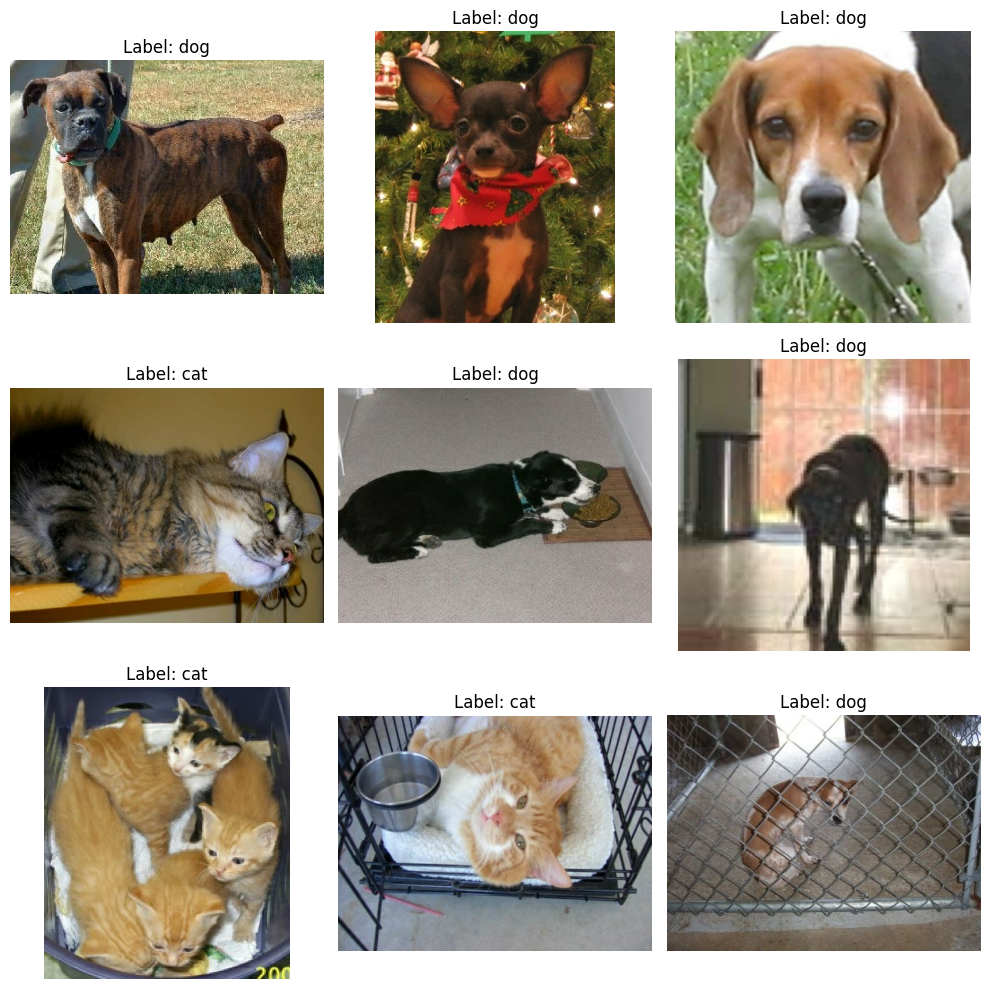

In [ ]:
# Preprocess the data (resize and normalize)
def preprocess(image, label):
    return image, label

# Apply preprocessing to the training dataset
train_ds = train_ds.map(preprocess)

labels = ["cat", "dog"]

# Visualize a selection of images from the training dataset
def visualize_dataset(dataset, num_images=9):
    plt.figure(figsize=(10, 10))

    # Take a batch of images from the dataset
    for i, (image, label) in enumerate(dataset.take(num_images)):
        plt.subplot(3, 3, i + 1)  # Create a 3x3 grid for images

        # Convert image tensor to NumPy array and squeeze to remove dimensions if necessary
        plt.imshow(image.numpy())  # Ensure the image is in the correct format
        plt.title(f'Label: {labels[label.numpy()]}')  # Show the label
        plt.axis('off')  # Hide the axes

    plt.tight_layout()  # Adjust layout
    plt.show()


# Call the visualization function
visualize_dataset(train_ds)

In [ ]:
# Preprocess the data (resize and normalize)
def preprocess(image, label):
    image = tf.image.resize(image, (128, 128))  # Resize the image to 128x128
    # Optionally, you can add normalization here if needed
    image = image / 255.0  # Normalize pixel values to the range [0, 1]
    return image, label

train_ds = train_ds.map(preprocess)
test_ds = test_ds.map(preprocess)

In [ ]:
train_ds = train_ds.batch(32)
test_ds = test_ds.batch(32)

In [ ]:
tf.random.set_seed(42)
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, 3, activation="relu", input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(16, 3, activation="relu"),
    tf.keras.layers.Conv2D(16, 3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_0.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 126, 126, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 61, 61, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 59, 59, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 55696)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │          55,697 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,409 (232.07 KB)

 Trainable params: 59,409 (232.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_0.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_0 = model_0.fit(train_ds,
                        epochs = 5,
                        steps_per_epoch = len(train_ds),
                        validation_data = test_ds,
                        validation_steps = int(0.15 * len(test_ds)))

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.6281 - loss: 0.6458 - val_accuracy: 0.7440 - val_loss: 0.5415
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


582/582 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7336 - val_loss: 0.5460
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.7445 - loss: 0.5198 - val_accuracy: 0.7098 - val_loss: 0.5586
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7634 - val_loss: 0.4801
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 39s 38ms/step - accuracy: 0.7980 - loss: 0.4370 - val_accuracy: 0.7440 - val_loss: 0.5347


Text(0.5, 0, 'epochs')

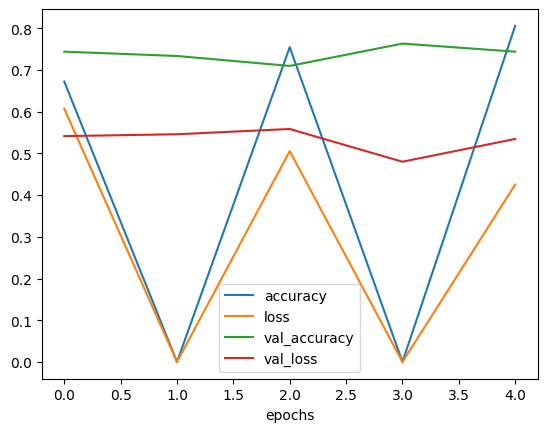

In [ ]:
import pandas as pd
pd.DataFrame(history_0.history).plot()
plt.xlabel("epochs")

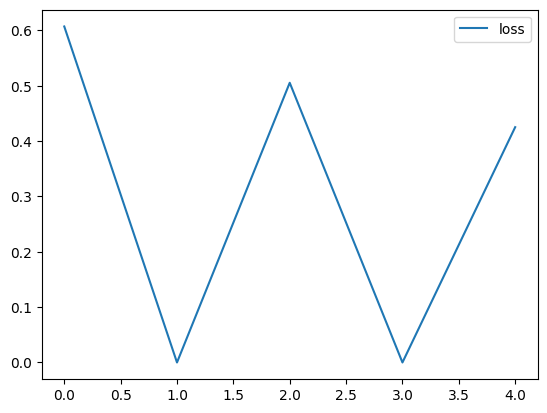

In [ ]:
plt.plot(history_0.history["loss"], label="loss")
plt.legend()

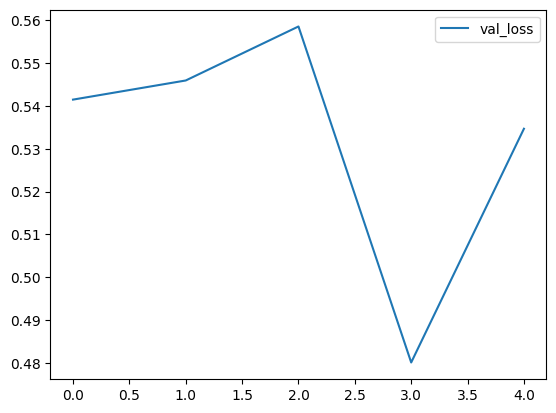

In [ ]:
plt.plot(history_0.history["val_loss"], label="val_loss")
plt.legend()

In [ ]:
model_0.evaluate(test_ds)

146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7402 - loss: 0.5536


[0.5509400963783264, 0.7381771206855774]

146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step


<ipython-input-48-f90cc5183b14>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = labels[int(y_preds[i * image_batch.shape[0] + j])]  # Get the predicted label


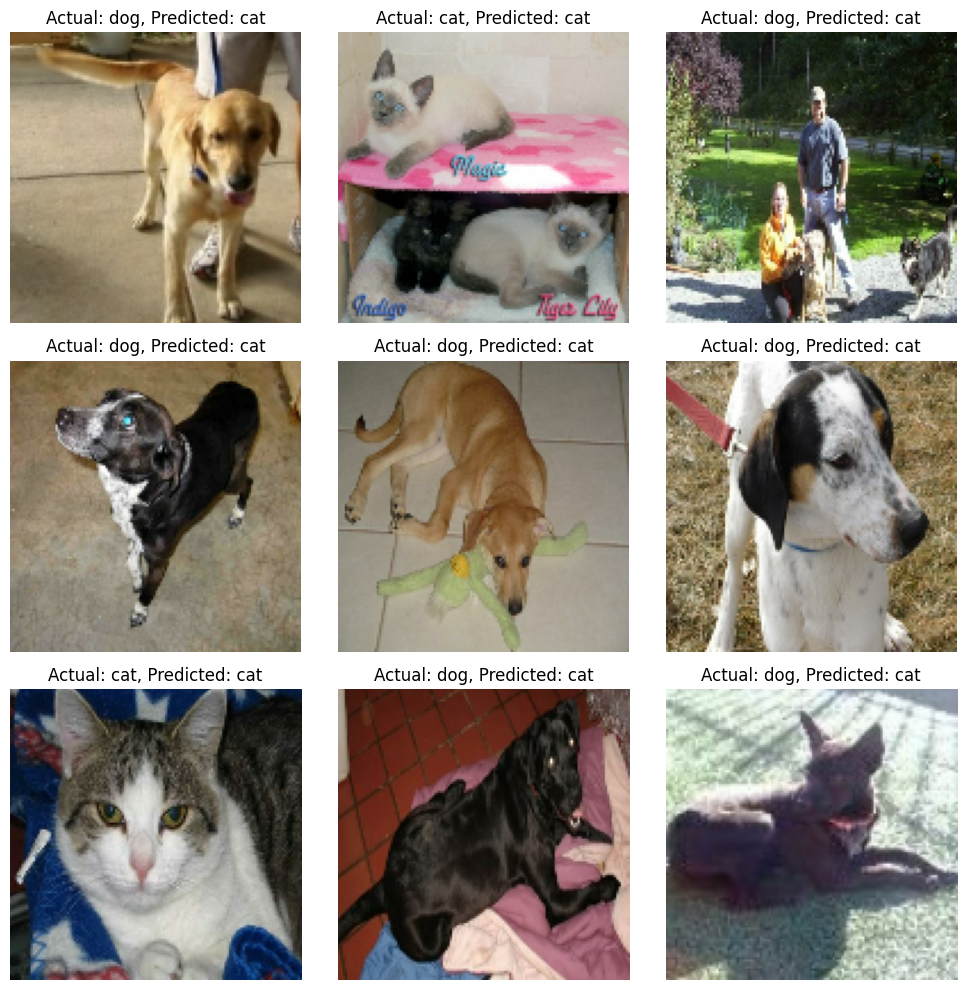

In [ ]:
import matplotlib.pyplot as plt

# Define the visualization function
def visualize_predictions(test_ds, y_preds, num_images=9):
    plt.figure(figsize=(10, 10))

    # Iterate through the test dataset to get images and labels
    for i, (image_batch, label_batch) in enumerate(test_ds.take(num_images)):
        # Iterate through individual images in the batch
        for j in range(image_batch.shape[0]):  # Iterate over images in the batch
            if i * image_batch.shape[0] + j >= num_images:
                break  # Stop if we have visualized enough images
            plt.subplot(3, 3, i * image_batch.shape[0] + j + 1)

            # Display the image
            image = image_batch[j]  # Extract single image from batch
            plt.imshow(image.numpy())  # Convert tensor to NumPy array
            predicted_label = labels[int(y_preds[i * image_batch.shape[0] + j])]  # Get the predicted label

            # Show both actual and predicted labels
            plt.title(f'Actual: {labels[label_batch[j].numpy()]}, Predicted: {predicted_label}')
            plt.axis('off')  # Hide the axes

    plt.tight_layout()
    plt.show()

# Use the model to predict labels for the test dataset
y_preds = model_0.predict(test_ds)  # Assuming model_0 is your trained model

# Call the visualization function
visualize_predictions(test_ds, y_preds)

Text(70.72222222222221, 0.5, 'Actual')

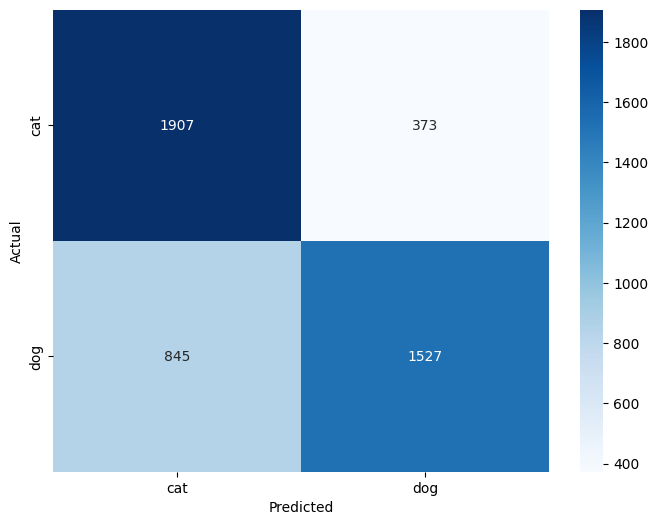

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Extract the true labels (y_test) from the test dataset
y_test = []
for _, label_batch in test_ds:  # Iterate through the test dataset
    y_test.extend(label_batch.numpy())  # Append the labels to y_test
y_test = np.array(y_test)  # Convert y_test to a NumPy array

# Convert the predictions to binary labels (0 or 1)
y_pred_binary = np.round(y_preds).flatten()  # Call flatten()

# Now you can create the confusion matrix
cm = confusion_matrix(y_test, y_pred=y_pred_binary)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')